**Alberto Halim Limantoro - 0706022210054**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Load Dataset

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/Yurohime/DATA-MINING-SEMESTER-5/refs/heads/main/datasets/Bank.csv',delimiter=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
309,38,admin.,married,tertiary,no,605,no,no,cellular,18,nov,147,2,-1,0,unknown,no
1055,36,management,single,tertiary,no,3343,no,no,cellular,18,nov,307,1,-1,0,unknown,no
3105,30,services,divorced,secondary,no,0,yes,no,cellular,13,may,172,1,-1,0,unknown,no
3590,41,unemployed,married,tertiary,no,1666,no,no,unknown,9,jun,291,3,-1,0,unknown,no
3254,40,admin.,married,secondary,no,1327,yes,yes,unknown,26,may,76,2,-1,0,unknown,no
1469,59,technician,married,secondary,no,259,no,no,cellular,15,jun,415,1,89,1,success,yes
1279,32,management,married,tertiary,no,913,yes,no,cellular,23,jun,883,1,674,4,failure,no
874,38,management,single,tertiary,no,15030,yes,no,cellular,13,may,167,1,174,7,other,no
2222,34,admin.,married,secondary,no,475,yes,no,unknown,7,may,559,1,-1,0,unknown,no
3865,35,services,married,secondary,no,0,yes,no,cellular,18,may,146,2,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [46]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [47]:
print(df.describe())


               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [48]:
print(df.nunique())

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


In [49]:
df.dropna(inplace=True)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [50]:
print("\nCount of 'unknown' values per column:")
print(df.apply(lambda x: (x == 'unknown').sum()))


Count of 'unknown' values per column:
age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [51]:
# Replace 'unknown' in 'contact' and 'poutcome' columns with a new category 'unknown_contact' and 'unknown_poutcome'
df['contact'] = df['contact'].replace('unknown', 'unknown_contact')
df['poutcome'] = df['poutcome'].replace('unknown', 'unknown_poutcome')

# Drop rows where 'job' and 'education' have 'unknown' values (since these are fewer and may affect modeling quality)
df_c = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]

# Combine similar values in the 'job' column
df_c['job'] = df_c['job'].replace({'admin.': 'management', 'management': 'management'})


C:\Users\Lolz\AppData\Local\Temp\ipykernel_19560\1040102015.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['job'] = df_c['job'].replace({'admin.': 'management', 'management': 'management'})


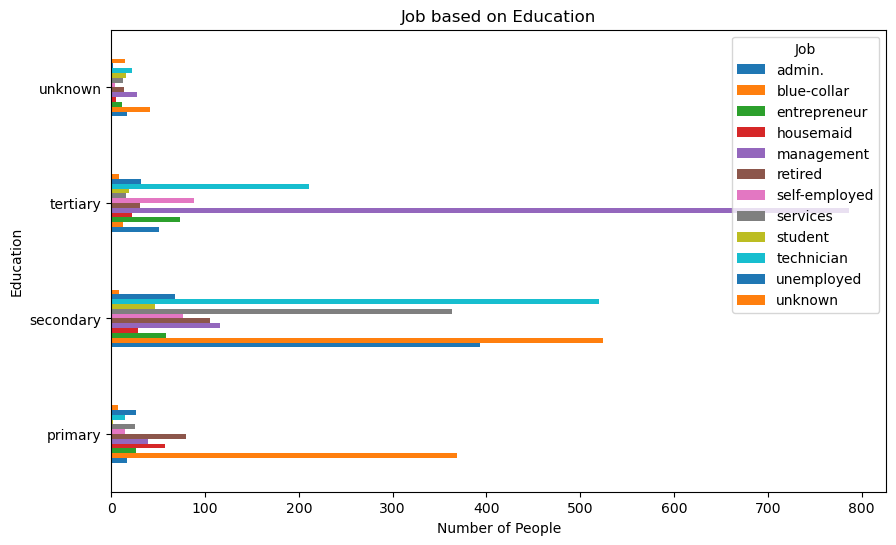

In [52]:
count_type_by_quality = df.groupby(['education','job'])['job'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))

plt.title('Job based on Education')
plt.ylabel('Education')
plt.xlabel('Number of People')
plt.legend(title='Job')
plt.show()

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown_poutcome,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown_contact,3,jun,199,4,-1,0,unknown_poutcome,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown_contact,5,may,226,1,-1,0,unknown_poutcome,no


In [54]:
label_encoders = {}
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


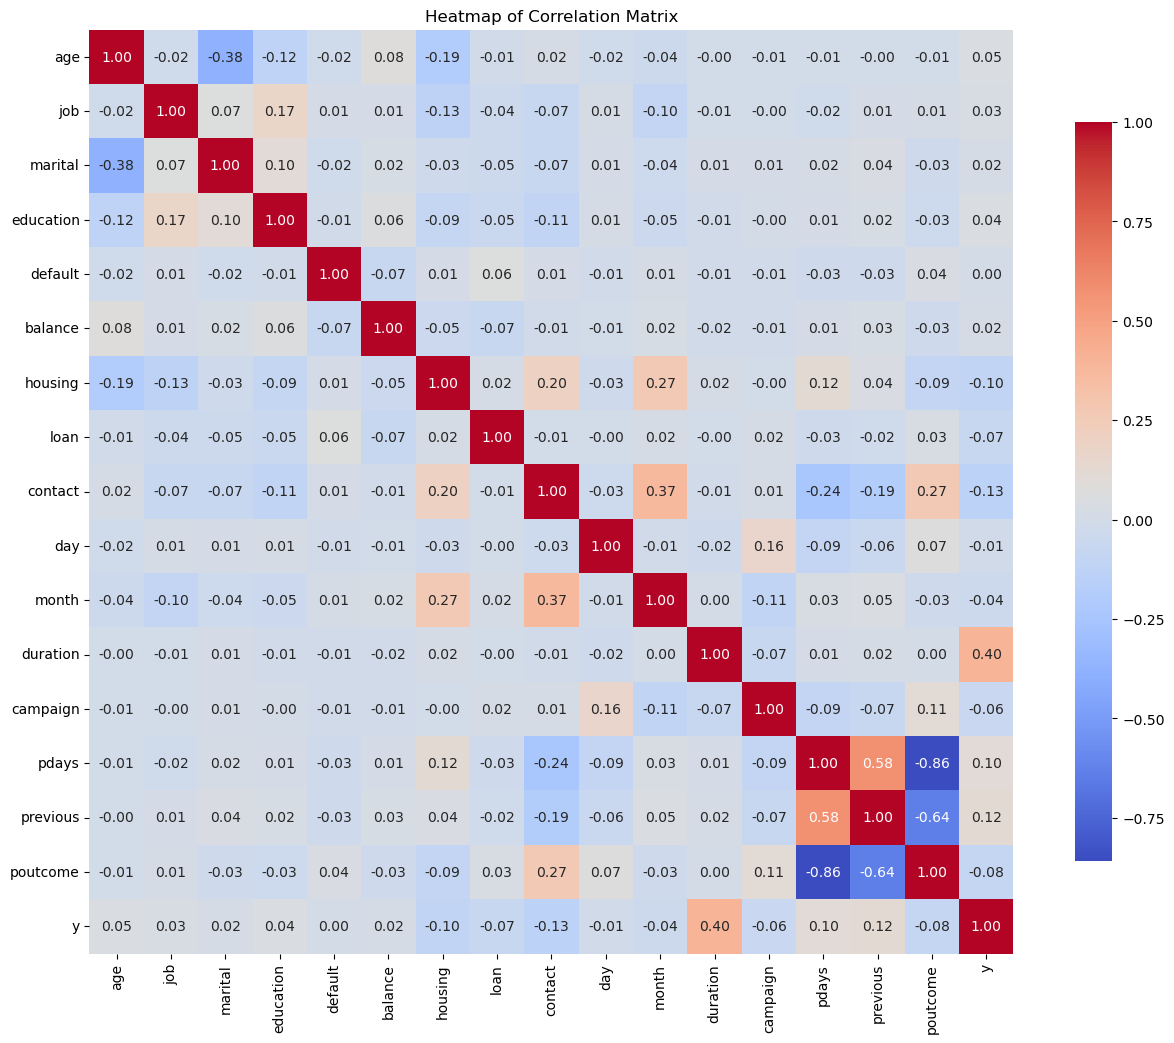

In [55]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Machine Learning (Split Data)

In [56]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [57]:
#a. Defining the model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
#b. Predict test results
y_pred_rf = rf_clf.predict(X_test)

In [59]:
#c. Accuracy score
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score with criterion entropy: 0.8983


Random Forest


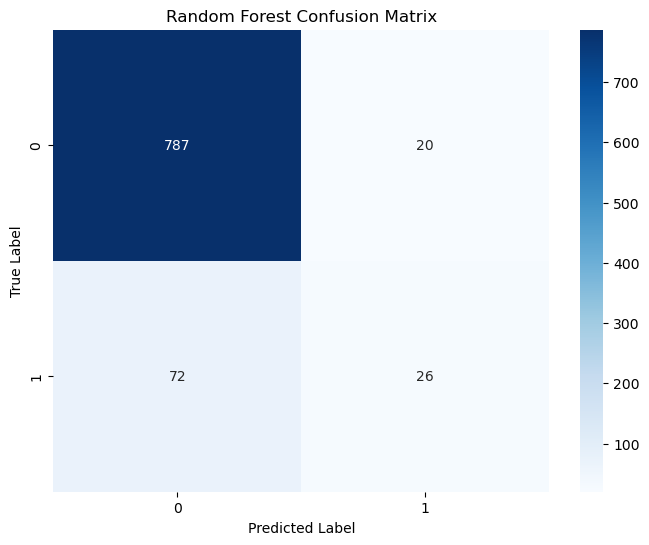

In [60]:
#d. Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Random Forest")
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
#e. Classification Report
from sklearn.metrics import classification_report
print("Random Forest Index")
print(classification_report(y_test, y_pred_rf))

Random Forest Index
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       807
           1       0.57      0.27      0.36        98

    accuracy                           0.90       905
   macro avg       0.74      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



#f. results and conclusion

Using the Random Forest Model, we can see that the accuracy of the model is around 90%
meaning this model is sufficient with calculating and prediciting future data result

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [62]:
#a. Defining the model
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42, max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [63]:
#b. Predict test results
y_pred_gbc = gbc_clf.predict(X_test)

In [64]:
#c. Accuracy score
from sklearn.metrics import accuracy_score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_gbc)))

Model accuracy score with criterion entropy: 0.8983


Gradient Boosting


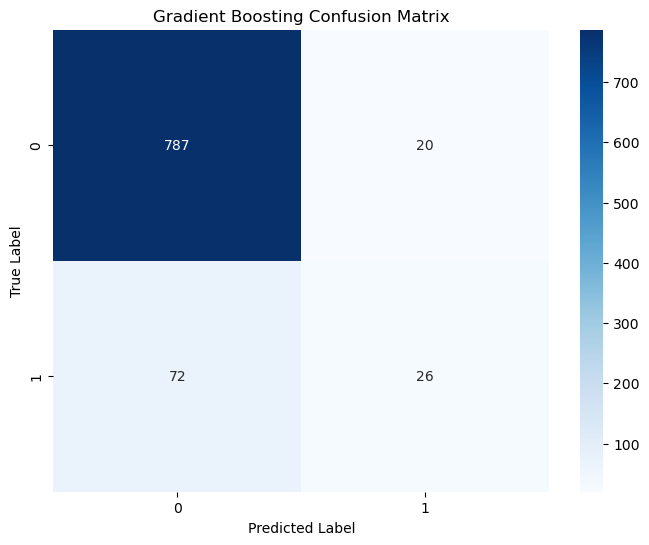

In [65]:
from sklearn.metrics import confusion_matrix
print("Gradient Boosting")
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
#e. Classification Report
from sklearn.metrics import classification_report
print("Gradient Boosting Classifier Index")
print(classification_report(y_test, y_pred_rf))

Gradient Boosting Classifier Index
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       807
           1       0.57      0.27      0.36        98

    accuracy                           0.90       905
   macro avg       0.74      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



#f. results and conclusion

Using the ,Gradient Boosting Classifier Model we can see that the accuracy of the model is around 90%
meaning this model is sufficient with calculating and prediciting future data result

Compared to using the Random Forest model, this model also performs well, 
meaning we can use either the random forest model or the gradient boosting classifier